# Project: Wrangling and Analyze Data


### Introduction
In this project, I will perform the complete data wrangling process on data from the twitter archive of twitter user WeRateDogs. WeRateDogs is a twitter account that rates people's dogs, ususally with a humorous comment about the dog


In [2]:
# Importing the relevant packages
from bs4 import BeautifulSoup
import pandas as pd
import json
import os
import re
import tweepy
import datetime
import time
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Loading WeRateDogs Twitter archive data into a pandas dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [4]:
# importing the dog breed file
dog_breed_df = pd.read_csv('new_folder/image-predictions.tsv', sep='\t')
dog_breed_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [40]:
consumer_key =''
consumer_key_secret = ''
bearer_token = ''
access_token = ''
access_token_secret = ''
# authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')
tweet_ids = df['tweet_id'].values




Successful Authentication


In [44]:
# ref: https://www.kaggle.com/code/pulleyba/project-data-wrangling/notebook
    from timeit import default_timer as timer
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [5]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        tweet_id = data.get('id')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [6]:
twitter_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5281,29258
2,891815181378084864,3467,21993
3,891689557279858688,7201,36827
4,891327558926688256,7724,35218


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Inspection
Below, I visually inspected the various tables without using any code

#### WeRateDogs Twitter archive Table

In [3]:
# Visually inspecting the WeRateDogs Twitter archive dataframe
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Quality Issues
1) retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contains a lot of missing values
2) retweeted_status_user_id	and retweeted_status_timestamp seem to be saved as float
3) name column contains incorrect details ie a, an, such, the
4) Doggo, Floofer, Pupper, puppo all contains None
5) source column contains the html tag
6) some tweets in `text` are not original tweets, but retweets we only want original tweets, not retweets

#### Dog breed predictions Table

In [7]:
# Visually inspecting the  Dog image prediction dataframe
dog_breed_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Quality
1) The column names are indescriptive
2) Some values in `p1` `p2` `p3` do not refer to a type of dog breed

#### Additional data Table

In [8]:
# Visually inspecting the additional dataframe
twitter_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5281,29258
2,891815181378084864,3467,21993
3,891689557279858688,7201,36827
4,891327558926688256,7724,35218
5,891087950875897856,2590,17762
6,890971913173991426,1649,10341
7,890729181411237888,15698,56710
8,890609185150312448,3605,24461
9,890240255349198849,6083,27880


#### Quality



#### Tidiness
1) This table does not make sense standing alone it needs to be merged with the other tables

## Programmatic Inspection
Below, I used code to further inspect the DataFrames

#### Twitter data archive

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* `in_reply_to_user_id`   `in_reply_to_status_id`  `retweeted_status_id` `retweeted_status_user_id` `retweeted_status_user_id` and `retweeted_status_timestamp` have a lot of missing values
* `retweeted_status_timestamp` and `timestamp` are strings, they should be astype datetime

In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* `rating_denominator` has a minimum value of 0.00 and a maximum number of 170.00 this is invalid, as all the rating denominators must be 10
* `rating_numerator` has a maximum value of 1776.00 this is mostlikey invalid


In [11]:
# inspecting one of the smallest column
df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [12]:
# inspecting doggo column since vissual inspection shows that it mostly contains'None' as value
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df.doggo.isnull().sum()

0

while the doggo column contains a lot of *None* values, they are not null

In [14]:
df.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Daisy            7
an               7
Buddy            7
Bailey           7
Toby             7
Koda             6
Leo              6
Dave             6
Jack             6
Bella            6
Scout            6
Stanley          6
Jax              6
Rusty            6
Oscar            6
Milo             6
Alfie            5
              ... 
Rhino            1
infuriating      1
Raphael          1
Chadrick         1
River            1
Harry            1
Millie           1
Mookie           1
Ralphson         1
Trevith          1
Wishes           1
Eevee            1
Edd              1
Amber            1
Brutus           1
Timofy           1
Malikai          1
Eazy             1
Simba            1
Chubbs           1
Odin             1
Crimson     

a lot of errors that are not possibly names recorded as names

In [15]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

df.source contains html surce code

#### Dog breed table

In [16]:
# programmatic inspection
dog_breed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* The column name of the dog breed image prediction table needs to be more descriptive
From the project rubric, it was given that:
* tweet_id is the last part of the tweet URL after "status/" 
* p1 is the algorithm's #1 prediction for the image in the tweet 
* 1_conf is how confident the algorithm is in its #1 prediction 
* p1_dog is whether or not the #1 prediction is a breed of dog 
* p2 is the algorithm's second most likely prediction 
* p2_conf is how confident the algorithm is in its #2 prediction 
* p2_dog is whether or not the #2 prediction is a breed of dog 

In [15]:
# getting the summary statistics
dog_breed_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### json_file data

In [20]:
# prorgrammatic inspection
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
# getting the summary statistics
twitter_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2461.704340,7034.784272
std,6.820795e+16,4169.214884,10931.852257
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.000000,1221.000000
50%,7.178418e+17,1147.000000,3041.000000
75%,7.986547e+17,2848.000000,8576.500000
max,8.924206e+17,70445.000000,144431.000000


### Quality issues
1. Missing values (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) contains a lot of missing values 

2. some tweets in `text` are not original tweets, but retweets we only want original tweets, not retweets 

3. The dog_breed table have nondescriptive column names 

4. rating_denominator has a minimum value of 0.00 and a maximum number of 170.00 this is invalid, as all the rating denominators must be 10

5. timestamp is a string, should be astype datetime

6. name column contains incorrect details ie a, an, such, the

7. replace None for Nan in Doggo, Floofer, Pupper, puppo columns

8. source column contains the html tag

### Tidiness issues
1. doggo, puppo, flufffer needs to be merged into one column

2. the additional data table need to be joined with the data from twitter archive

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
archive_copy = df.copy()
dog_breed_copy = dog_breed_df.copy()
twitter_copy = twitter_df.copy()

### Issue #1: Retweet texts

#### Define: 
Remove retweets by removing tweets that contains 'RT', and leave only original tweets

#### Code

In [8]:
archive_copy = archive_copy[~archive_copy['text'].str.contains('RT')]

#### Test

In [20]:
archive_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
2072,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016...,8,10,Toby,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,None,None,None,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033...,5,10,Juckson,None,None,None,None
1387,700505138482569216,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None


### Issue #2: Irrelevant columns

In [21]:
archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Define
Drop all columns containing null vaues, and irrelevant data i.e ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',  'doggo', 'floofer', 'pupper', 'puppo')

#### Code

In [9]:
archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',  'doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [10]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

### Issue #3: Non descriptve dog_breed table name

#### Define
Rename 'p1', 'p2', 'p3' columns in dog_breed_copy table

#### Code

In [10]:
dog_breed_copy.rename(columns = {'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3'}, inplace = True)

### Issue #4: multiple columns for a single value

#### Define
Combine doggo, floofer, pupper, pupp into one column, dog_stage by extracting this information from the `archive_copy['text']` column

#### Code

In [11]:
archive_copy['dog_stage'] = archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [10]:
archive_copy['dog_stage']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29      pupper
         ...  
2326       NaN
2327       NaN
2328       NaN
2329       NaN
2330       NaN
2331       NaN
2332       NaN
2333       NaN
2334       NaN
2335       NaN
2336       NaN
2337       NaN
2338       NaN
2339       NaN
2340       NaN
2341       NaN
2342       NaN
2343       NaN
2344       NaN
2345       NaN
2346       NaN
2347       NaN
2348       NaN
2349       NaN
2350       NaN
2351       NaN
2352       NaN
2353       NaN
2354       NaN
2355       NaN
Name: dog_stage, Length: 2356, dtype: object

In [27]:
archive_copy['text'].head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

### Issue 5: Non standardized denominators

#### Define: 
Standardize the rating_denominator make all rating_denominator equal to 10

#### Code:

In [12]:
# for denominators greater than 10
for denominator in archive_copy['rating_denominator']:
    if denominator > 10:
        archive_copy.rating_denominator = 10
        

In [13]:
# for denominators less than 10
for denominator in archive_copy.rating_denominator:
    if denominator < 10:
        archive_copy.rating_denominator = 10

#### Test:

In [31]:
archive_copy.rating_denominator.value_counts()

10    2164
Name: rating_denominator, dtype: int64

### Issue 6: Data type of archive_copy.timestamp

#### Define: Strip the timestamp column of timezone, and change to a datetime column

#### Code:

In [14]:
#Remove the time zone from the 'timestamp' column
archive_copy['timestamp'] = archive_copy['timestamp'].str.slice(start=0, stop=-6)

In [15]:
# Converting to datetime
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

### Issue 7: Incorrect Dog names

#### Define: Remove incorrect names from archive_copy.Name Column

#### Code:

In [16]:
# Removing column names with incorrect values
archive_copy.name.str.replace('^[a-z]+', 'None')

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Issue 8: html tag in archive.source Column

#### Define: Remove the HTML tags in the source column, by replacing the string values

#### Code

In [17]:
# Removing HTML values from archive_copy.source column
# Ref: https://github.com/jtrob704/Data-Wrangling-Project/blob/master/wrangle_act.ipynb
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [38]:
archive_copy['source'].sample(20)

47      Twitter for iPhone
181     Twitter for iPhone
1119    Twitter for iPhone
1165    Twitter for iPhone
1265    Twitter for iPhone
2164    Twitter for iPhone
1781    Twitter for iPhone
871     Twitter for iPhone
2317    Twitter for iPhone
2257    Twitter Web Client
2263    Twitter Web Client
1234    Twitter for iPhone
2038    Twitter for iPhone
219     Twitter for iPhone
2       Twitter for iPhone
1382    Twitter for iPhone
1405    Twitter for iPhone
1628                  Vine
1801    Twitter for iPhone
22      Twitter for iPhone
Name: source, dtype: object

In [18]:
# Merging the additinal twitter data, with the twitter archive data
master_archive = archive_copy.merge(twitter_copy, on='tweet_id')

### Merging all three datasets

In [19]:
# combining all the tables into one dataframe
twitter_archive_master = master_archive.merge(dog_breed_copy, on='tweet_id')
# # Ref: https://github.com/Abhishek20182/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
# twitter_archive_master = pd.concat([archive_copy, dog_breed_copy, twitter_copy], join='outer', axis=1)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [20]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

* What is the correlation between numerical columns of the dataset
* What is the most liked breed of dog, using the favorite_count
* What is the relationship between numerator rating f the dogs, and favorite count

In [34]:
# getting the correlation
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.023631,NaN,0.391298,0.619182,0.213603,0.106170,0.118569,-0.003046,0.122212,-0.048321,0.096282
rating_numerator,0.023631,1.000000,NaN,0.018617,0.016052,-0.000711,-0.009254,-0.029121,-0.020897,-0.034727,-0.004127,-0.029299
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.391298,0.018617,NaN,1.000000,0.927316,0.106666,0.045126,0.008489,-0.010557,0.011389,-0.037221,0.004356
favorite_count,0.619182,0.016052,NaN,0.927316,1.000000,0.132287,0.068397,0.048975,-0.013463,0.050865,-0.045873,0.033142
img_num,0.213603,-0.000711,NaN,0.106666,0.132287,1.000000,0.203855,0.033041,-0.156633,0.052381,-0.140987,0.063610
p1_conf,0.106170,-0.009254,NaN,0.045126,0.068397,0.203855,1.000000,0.129179,-0.510805,0.140169,-0.707038,0.120061
p1_dog,0.118569,-0.029121,NaN,0.008489,0.048975,0.033041,0.129179,1.000000,0.110278,0.637988,0.046086,0.558362
p2_conf,-0.003046,-0.020897,NaN,-0.010557,-0.013463,-0.156633,-0.510805,0.110278,1.000000,0.097957,0.481745,0.065909
p2_dog,0.122212,-0.034727,NaN,0.011389,0.050865,0.052381,0.140169,0.637988,0.097957,1.000000,0.036586,0.555544


* There is a positive correlation between retweet_count and favorite_count

In [26]:
# Getting the average favorite_count for the different breed of dogs
twitter_archive_master.groupby('prediction1')['favorite_count'].mean().sort_values()

prediction1
desktop_computer        99.000000
crash_helmet           181.000000
hay                    213.000000
trombone               247.000000
piggy_bank             284.000000
platypus               288.000000
pitcher                313.000000
lorikeet               363.000000
coho                   371.000000
fire_engine            372.000000
cuirass                376.000000
ibex                   423.000000
three-toed_sloth       425.000000
bearskin               452.000000
ping-pong_ball         484.000000
sea_urchin             501.000000
pot                    527.000000
boathouse              551.000000
king_penguin           557.000000
Arctic_fox             596.250000
bib                    609.000000
snail                  624.500000
lynx                   657.000000
lacewing               722.000000
Brabancon_griffon      743.000000
shopping_basket        768.000000
African_crocodile      810.000000
seashore               811.000000
picket_fence           833.000000
pa

In [22]:
# Getting the most popular breed of on the strength of the first and second prediction by the neuarl network
twitter_archive_master.groupby(['prediction1', 'prediction2'])['favorite_count'].mean().sort_values(ascending=False)

prediction1                  prediction2                   
Lakeland_terrier             Labrador_retriever                123782.0
English_springer             Boston_bull                        92548.0
standard_poodle              toy_poodle                         82490.0
Angora                       malamute                           80372.0
Labrador_retriever           ice_bear                           72686.0
bubble                       leafhopper                         70768.0
Arabian_camel                house_finch                        70416.0
Labrador_retriever           seat_belt                          62330.0
laptop                       French_bulldog                     57819.0
Pomeranian                   Eskimo_dog                         56710.0
Rottweiler                   Tibetan_mastiff                    53865.0
boxer                        dalmatian                          50198.0
gondola                      sea_lion                           46184.0
Samo

In [23]:
#Relationship between numerator count and favrite count
twitter_archive_master.groupby('rating_numerator')['favorite_count'].mean().sort_values(ascending=False)

rating_numerator
14      25183.857143
420     22039.000000
13      19903.957031
75      17333.000000
0       11821.000000
84      11559.000000
12       9681.654709
27       6185.000000
11       5850.691919
24       5046.000000
1        4875.000000
1776     4772.000000
165      4467.000000
204      3544.000000
121      3512.000000
10       3430.762136
5        3344.666667
44       3164.000000
7        3133.961538
144      2782.000000
60       2691.000000
99       2618.000000
88       2418.000000
4        2390.375000
6        2274.875000
45       2265.000000
9        2236.993377
50       2193.000000
80       2139.000000
8        2056.336842
3        1999.526316
2        1868.111111
26       1573.000000
143      1142.000000
Name: favorite_count, dtype: float64

### Insights:
1. The number of retweets for a rating increases with increasing likes

2. The least favrite dogs are dogs breed which are not accurately predicted by the neural network

3. Dogs with high numeratr ratings are typically the favorite of audiences, from the number of likes

### Visualization

Text(0.5,1,'Number of retweets by Number of likes')

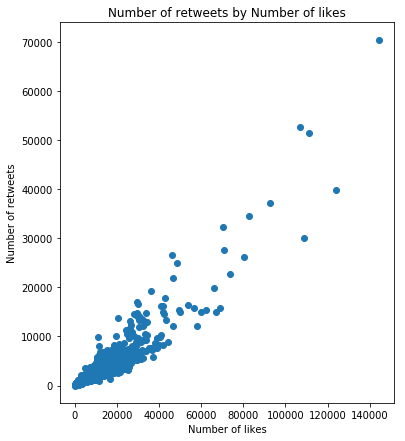

In [24]:
# plotting a graph of likes vs retweetS
x = twitter_archive_master['favorite_count']
y = twitter_archive_master['retweet_count']

plt.figure(figsize=(6,7))
plt.scatter(x,y)

plt.xlabel("Number of likes")
plt.ylabel("Number of retweets")
plt.title("Number of retweets by Number of likes")

Text(0.5,1,'Number of likes vs Ratings')

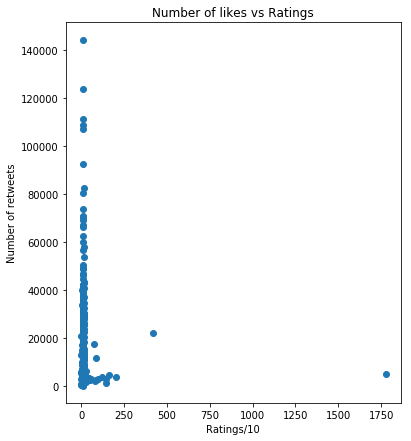

In [28]:
x = twitter_archive_master['rating_numerator']
y = twitter_archive_master['favorite_count']
plt.figure(figsize=(6,7))
plt.scatter(x,y)
plt.xlabel("Ratings/10")
plt.ylabel("Number of retweets")
plt.title("Number of likes vs Ratings")